In [9]:
import numpy
!pip install pygad
import pygad.nn
import pygad.gann

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
data_inputs = numpy.array([[1, 1], [1, 0], [0, 1], [0, 0]])
data_outputs = numpy.array([0, 1, 1, 0])

num_inputs = data_inputs.shape[1]
num_classes = 2
num_solutions = 10
G = pygad.gann.GANN(num_solutions=num_solutions,
                                num_neurons_input=num_inputs,
                                num_neurons_hidden_layers=[2],
                                num_neurons_output=num_classes,
                                hidden_activations=["relu"],
                                output_activation="softmax")


def f(solution, index):
    global G, data_inputs, data_outputs
    predictions = pygad.nn.predict(last_layer=G.population_networks[index], data_inputs=data_inputs)
    correct_predictions = numpy.where(predictions == data_outputs)[0].size
    solution_fitness = (correct_predictions/data_outputs.size)*100
    return solution_fitness

def on_generation(ga_instance):
    global G
    population_matrices = pygad.gann.population_as_matrices(population_networks=G.population_networks, population_vectors=ga_instance.population)
    G.update_population_trained_weights(population_trained_weights=population_matrices)

population_vectors = pygad.gann.population_as_vectors(population_networks=G.population_networks)
initial_population = population_vectors.copy()

ga_instance = pygad.GA(num_generations=50, 
                       num_parents_mating=4, 
                       initial_population=initial_population,
                       fitness_func=f,
                       mutation_percent_genes=10,
                       mutation_num_genes=2,
                       init_range_low=-5,
                       init_range_high=5,
                       parent_selection_type="rws",
                       crossover_type="single_point",
                       mutation_type="random",
                       keep_parents=1,
                       on_generation=on_generation)

ga_instance.run()

In [11]:
solution, solution_fitness, solution_index = ga_instance.best_solution()
print("Parameters of the best solution : {}".format(solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

Parameters of the best solution : [-1.62516167  0.76088179  0.15522198 -1.46208025 -1.3095108  -1.19135227
 -1.53374172  0.04979256]
Fitness value of the best solution = 100.0


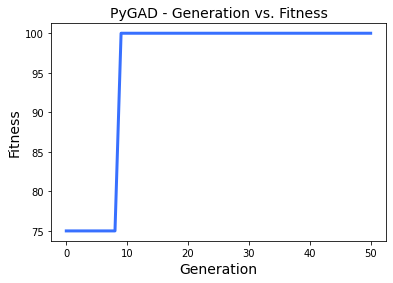

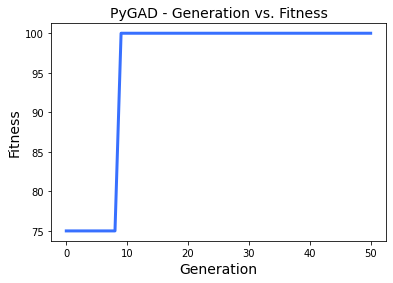

In [13]:
ga_instance.plot_fitness()